In [ ]:
!apt-get install r-base
!apt-get install libcurl4-openssl-dev libssl-dev libxml2-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcurl4-openssl-dev is already the newest version (7.81.0-1ubuntu1.19).
libssl-dev is already the newest version (3.0.2-0ubuntu1.18).
libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R

install.packages("BiocManager")

In [ ]:
%%R
unlink("~/.R/cache", recursive = TRUE)
BiocManager::install("DESeq2")

In [ ]:
%%R
library("DESeq2")
packageVersion("DESeq2")

In [ ]:
%%R
res_0M <- read.delim("/content/drive/MyDrive/htseqModResults/0M_output.csv", header = FALSE)
res_0P <- read.delim("/content/drive/MyDrive/htseqModResults/0P_output.csv", header = FALSE)
res_1a <- read.delim("/content/drive/MyDrive/htseqModResults/1a_output.csv", header = FALSE)
res_2P <- read.delim("/content/drive/MyDrive/htseqModResults/2P_output.csv", header = FALSE)
res_3L <- read.delim("/content/drive/MyDrive/htseqModResults/3L_output.csv", header = FALSE)
res_4C <- read.delim("/content/drive/MyDrive/htseqModResults/4C_output.csv", header = FALSE)


rownames(res_0M) <- res_0M$V1
res_0M <- res_0M[, -1]
colnames(res_0M) <- gsub('V', '0M', colnames(res_0M))

rownames(res_0P) <- res_0P$V1
res_0P <- res_0P[, -1]
colnames(res_0P) <- gsub('V', '0P', colnames(res_0P))

rownames(res_1a) <- res_1a$V1
res_1a <- res_1a[, -1]
colnames(res_1a) <- gsub('V', '1A', colnames(res_1a))

rownames(res_2P) <- res_2P$V1
res_2P <- res_2P[, -1]
colnames(res_2P) <- gsub('V', '2P', colnames(res_2P))

rownames(res_3L) <- res_3L$V1
res_3L <- res_3L[, -1]
colnames(res_3L) <- gsub('V', '3L', colnames(res_3L))

rownames(res_4C) <- res_4C$V1
res_4C <- res_4C[, -1]
colnames(res_4C) <- gsub('V', '4C', colnames(res_4C))

# combine into singular count matrix
count_data <- cbind(res_0M, res_0P, res_1a, res_2P, res_3L, res_4C)
head(count_data)




In [ ]:
%%R
# create meta to run deseq
sample_metadata <- data.frame(
  sample = colnames(count_data),
  condition = c(rep("control_0m", 8), rep("control_0p", 8), rep("treat_1a", 6), rep("treat_2p", 8),
                rep("treat_3l", 8), rep("treat_4c", 8))
)

# check data
sample_metadata

In [ ]:
%%R

dds <- DESeqDataSetFromMatrix(countData = count_data,
                              colData = sample_metadata,
                              design = ~ condition)

# remove the lower expressed genes
dds <- dds[rowSums(counts(dds)) > 1,]
dds <- DESeq(dds)





   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.





In [ ]:
%%R
png(filename="/content/drive/MyDrive/htseqModResults/plots/DispEsts.png")
plotDispEsts(dds)
dev.off()

png 
  2 


In [ ]:
%%R

# store the results
res_treatment_m_1a <- results(dds, contrast = c("condition", "treat_1a", "control_0m"))
res_treatment_m_2p <- results(dds, contrast = c("condition", "treat_2p", "control_0m"))
res_treatment_m_31 <- results(dds, contrast = c("condition", "treat_3l", "control_0m"))
res_treatment_m_4c <- results(dds, contrast = c("condition", "treat_4c", "control_0m"))

res_treatment_p_1a <- results(dds, contrast = c("condition", "treat_1a", "control_0p"))
res_treatment_p_2p <- results(dds, contrast = c("condition", "treat_2p", "control_0p"))
res_treatment_p_3l <- results(dds, contrast = c("condition", "treat_3l", "control_0p"))
res_treatment_p_4c <- results(dds, contrast = c("condition", "treat_4c", "control_0p"))

write.csv(res_treatment_m_1a, file = "/content/drive/MyDrive/htseqModResults/res_treatment_m_1a.csv")
write.csv(res_treatment_m_2p, file = "/content/drive/MyDrive/htseqModResults/res_treatment_m_2p.csv")
write.csv(res_treatment_m_31, file = "/content/drive/MyDrive/htseqModResults/res_treatment_m_31.csv")
write.csv(res_treatment_m_4c, file = "/content/drive/MyDrive/htseqModResults/res_treatment_m_4c.csv")

write.csv(res_treatment_p_1a, file = "/content/drive/MyDrive/htseqModResults/res_treatment_p_1a.csv")
write.csv(res_treatment_p_2p, file = "/content/drive/MyDrive/htseqModResults/res_treatment_p_2p.csv")
write.csv(res_treatment_p_3l, file = "/content/drive/MyDrive/htseqModResults/res_treatment_p_3l.csv")
write.csv(res_treatment_p_4c, file = "/content/drive/MyDrive/htseqModResults/res_treatment_p_4c.csv")

In [ ]:
# import pandas as pd

# # load the counts
# log2_counts = pd.read_csv("/content/drive/MyDrive/htseqModResults/res_treatment1.csv", index_col=0)

# # remove garbage
# features_to_remove = ['__no_feature', '__ambiguous', '__alignment_not_unique']
# filtered = filtered[~log2_counts.index.isin(features_to_remove)]
# filtered = filtered['log2FoldChange']

# print(filtered.head())


### NO LONGER WORKS
# # gets the top 10 expressed genes
# def get_top_genes(file_path):
#     df = pd.read_csv(file_path, index_col=0, delimiter="\t")
#     df = df.drop(["__no_feature", "__alignment_not_unique", "__ambiguous"])
#     # add 1 to avoid log(0)
#     log2_counts = np.log2(df + 1)

#     # take largest sum
#     gene_expression = log2_counts.sum(axis=1)
#     top_10_genes = gene_expression.sort_values(ascending=False).head(10)
#     top_10_log2_counts = log2_counts.loc[top_10_genes.index]
#     top_10_log2_counts = top_10_log2_counts.dropna(axis=0, how='any')
#     return top_10_log2_counts

In [ ]:
!pip install mygene

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mygene

## This file just defines a bunch of functions to use in the next block


# choose top 10 significantly changed genes
def get_significant_genes(deseq2_results_file, pval_threshold=0.05, top_n=10):
    df = pd.read_csv(deseq2_results_file)
    df = df[df['padj'] < pval_threshold]
    df = df.reindex(df['log2FoldChange'].abs().sort_values(ascending=False).index)
    top_genes = df.head(top_n)
    return top_genes.iloc[:,0].tolist()

# gets the expression values
def get_gene_expression(file_path, top_gene_ids):
    df = pd.read_csv(file_path, index_col=0, delimiter="\t", header=None)
    return df.loc[top_gene_ids]

# plots the heatmap given gene expression
def plot_heatmap(top_10_control, top_10_treat, control, treatment):

  # compute average for expression, observe log2fold change
  avg_control = top_10_control.mean(axis=1)
  combined_top_genes = pd.concat([top_10_control.div(avg_control, axis=0),
                                  top_10_treat.div(avg_control, axis=0)], axis=1)
  combined_top_genes = np.log2(combined_top_genes + 0.00001)

  # get gene names (symbols)
  mg = mygene.MyGeneInfo()
  gene_ids = combined_top_genes.index.to_list()
  gene_info = mg.getgenes(gene_ids, fields="symbol")
  gene_names = {gene['query']: gene.get('symbol', gene['query']) for gene in gene_info}
  combined_top_genes = combined_top_genes.rename(index=gene_names)

  # plotting stuff
  fig, ax = plt.subplots(figsize=(14, 6))
  sns.heatmap(combined_top_genes, cmap="coolwarm", vmin=-3, vmax=3)

  # add some sub-axes and formatting + add lines to make it pretty
  ax.text(x=len(top_10_control.columns) / 2, y=10.9, s=control, ha="center", va="center", fontsize=10, style='italic')
  ax.text(x=len(top_10_control.columns) + len(top_10_treat.columns) / 2, y=10.9, s=treatment, ha="center", va="center", fontsize=10, style='italic')

  ax.vlines(linewidth=1, ls="--", color='b', x=8, ymax=0, ymin=10)
  ax.hlines(linewidth=3, color='b', y=10.2, xmin=0.26, xmax=7.76)

  # special formatting case for agrin because agrin has only 6 trials
  if (treatment == "Agrin"):
    ax.hlines(linewidth=3, color='b', y=10.2, xmin=8.25, xmax=13.76)
  else:
    ax.hlines(linewidth=3, color='b', y=10.2, xmin=8.25, xmax=15.76)

  ax.set_ylim(bottom=10.2)

  # done! save the plot
  plt.title("log\u2082 fold gene expression")
  plt.ylabel("Most (log\u2082 fold) changed genes")

  plt.savefig(fname = "/content/drive/MyDrive/htseqModResults/plots/" + control + "_" + treatment + ".png")
  plt.show()

INFO:biothings.client:querying 1-10...
INFO:biothings.client:done.


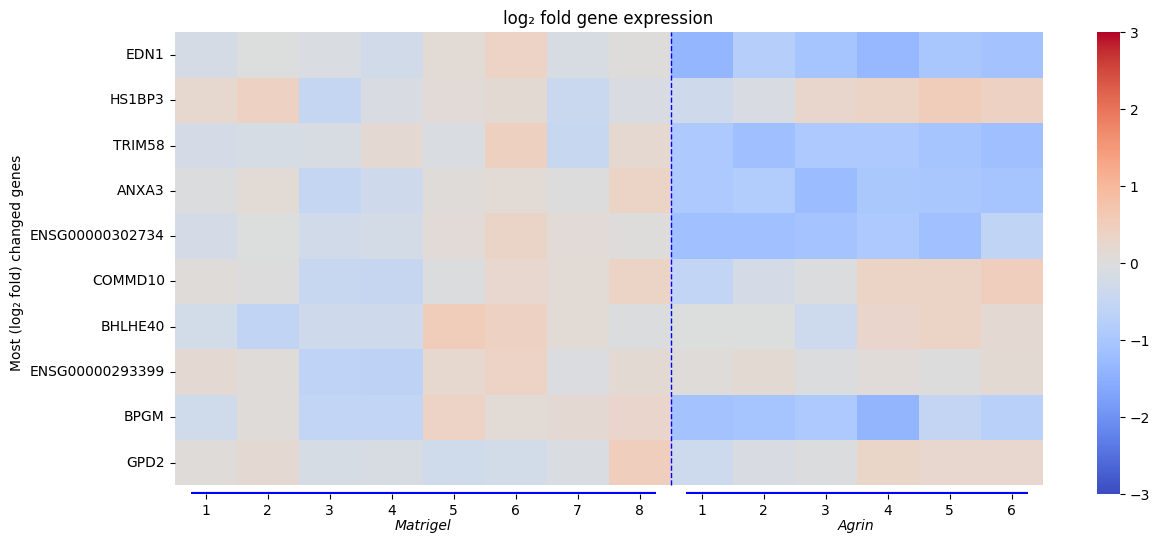

INFO:biothings.client:querying 1-10...
INFO:biothings.client:done.


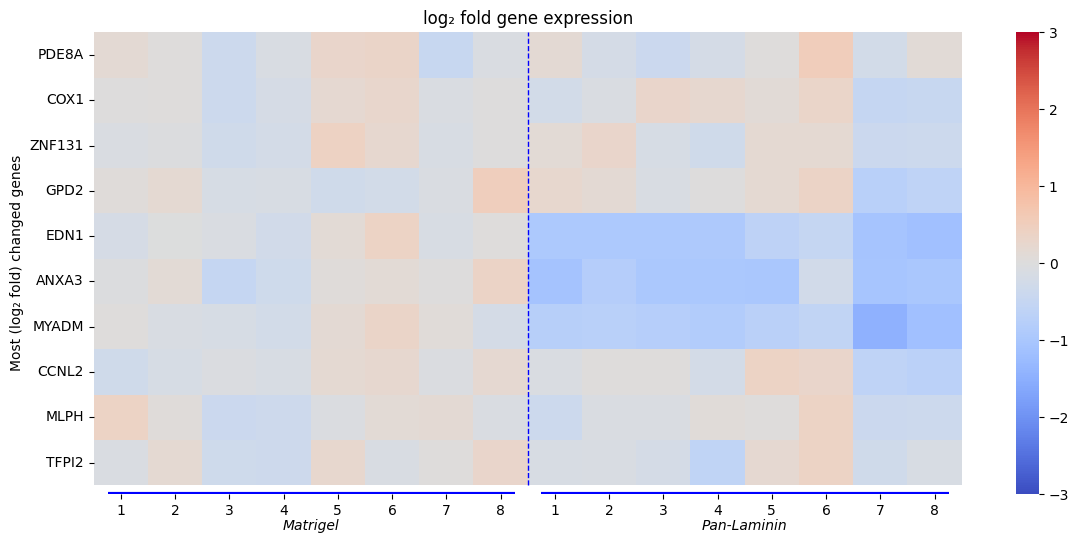

INFO:biothings.client:querying 1-10...
INFO:biothings.client:done.


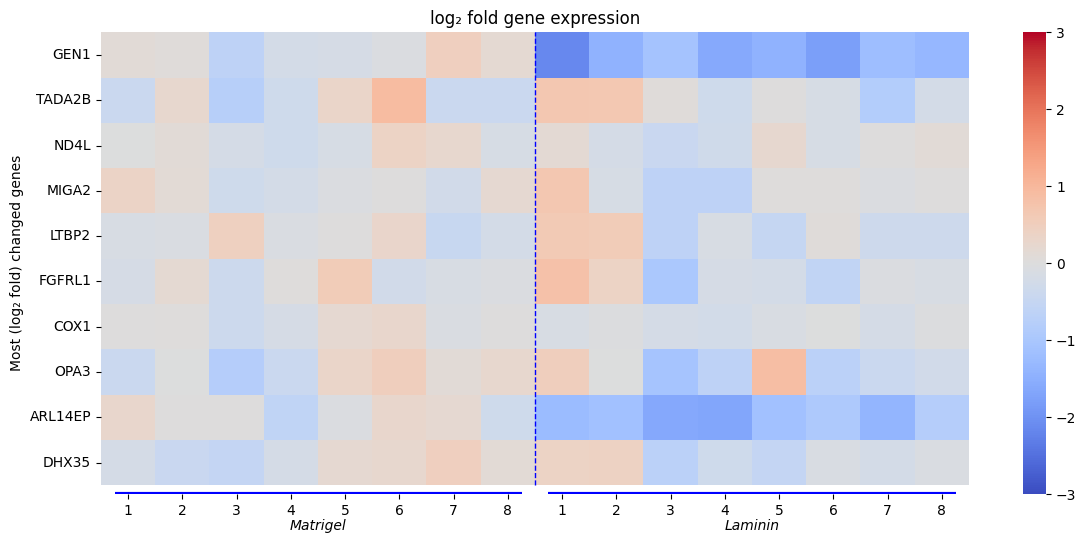

INFO:biothings.client:querying 1-10...
INFO:biothings.client:done.


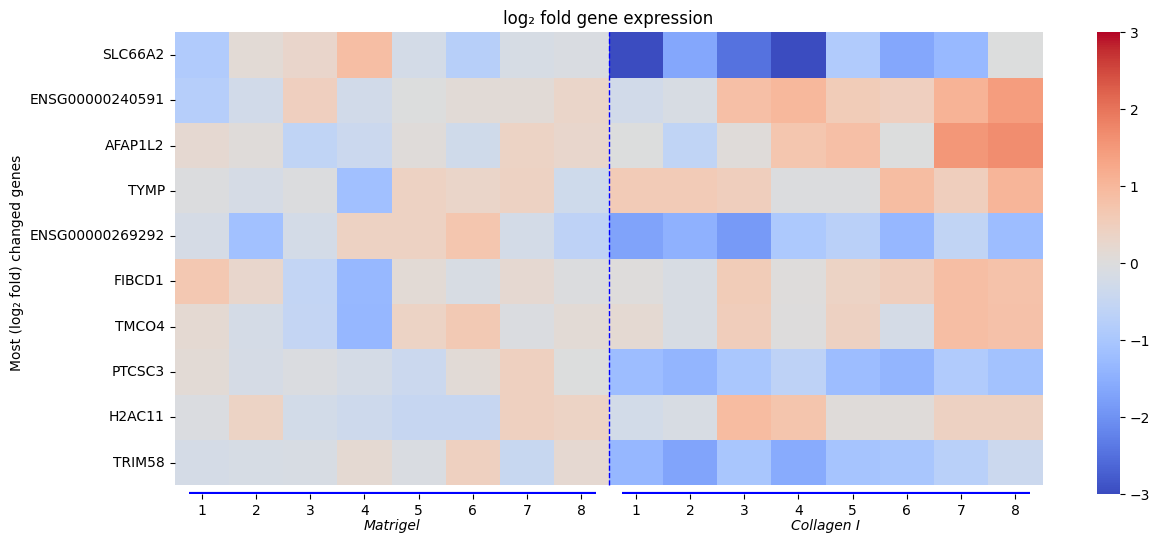

INFO:biothings.client:querying 1-10...
INFO:biothings.client:done.


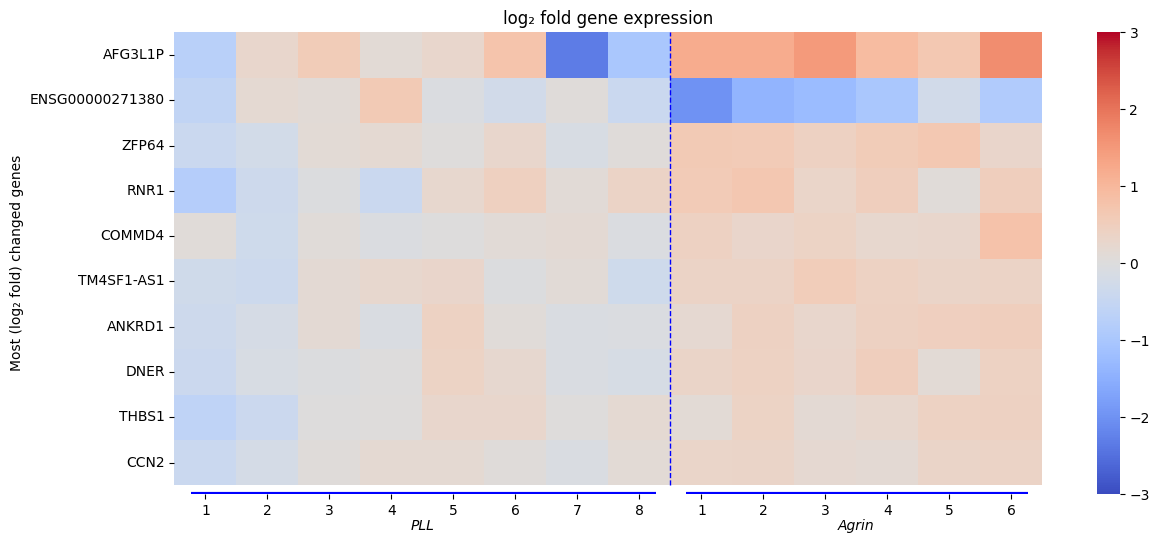

INFO:biothings.client:querying 1-10...
INFO:biothings.client:done.


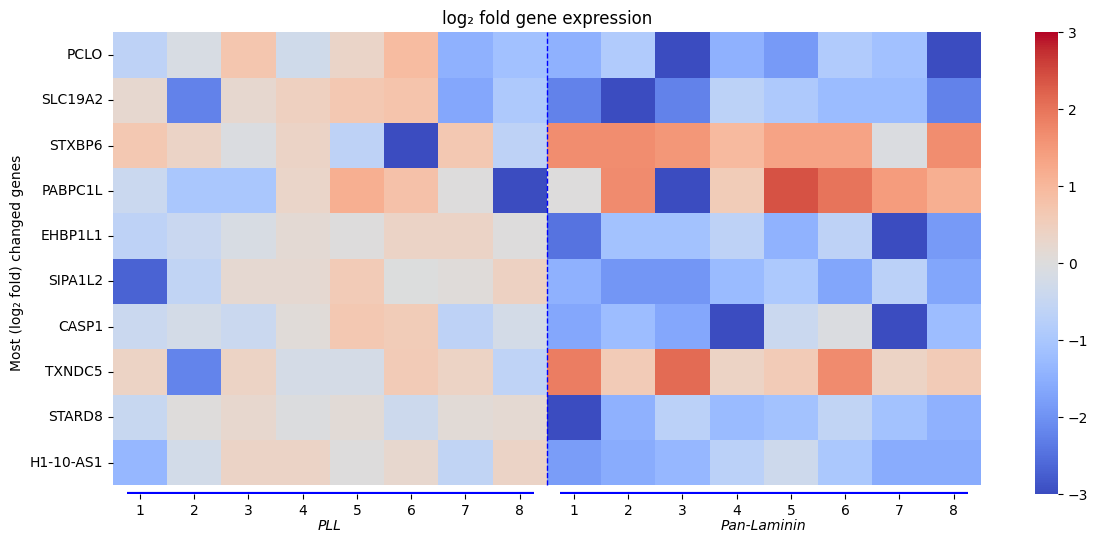

INFO:biothings.client:querying 1-10...
INFO:biothings.client:done.


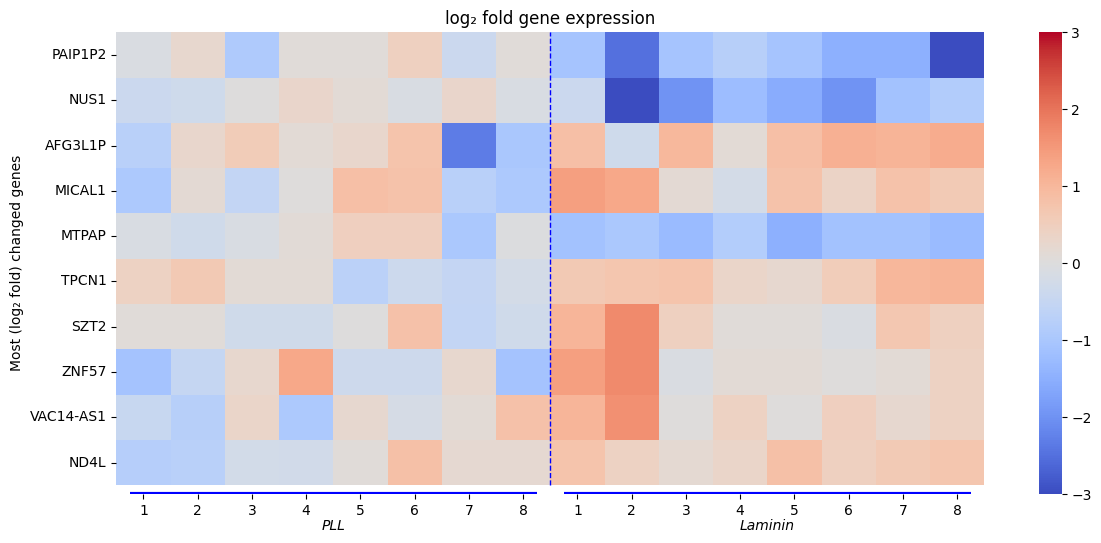

INFO:biothings.client:querying 1-10...
INFO:biothings.client:done.


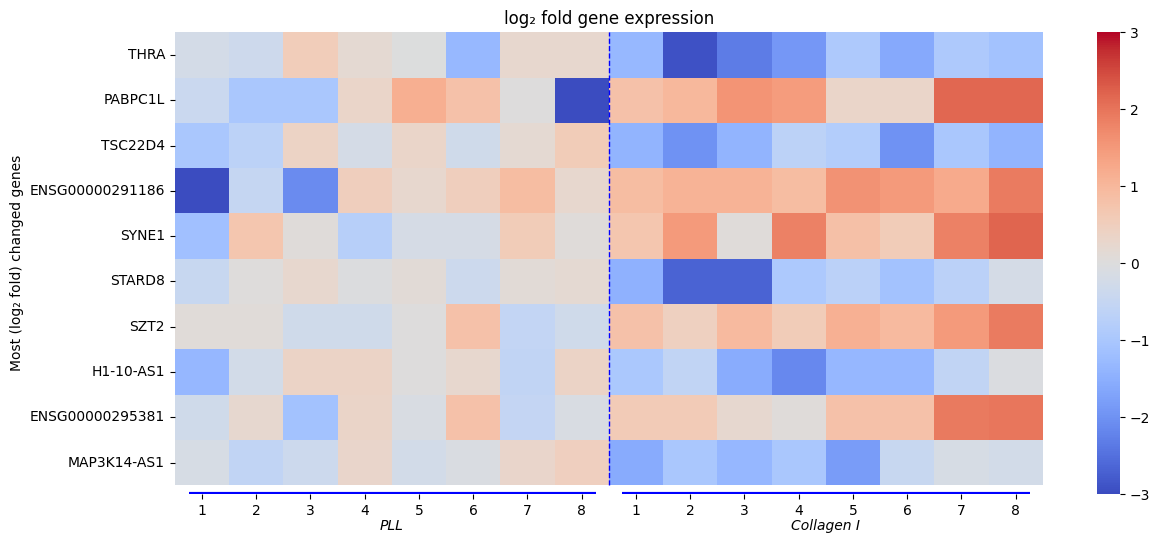

In [ ]:
# get all the most significantlly changed genes for each control/treatment pair
# choose only statistically significant ones (p < 0.05)
m_1a = "/content/drive/MyDrive/htseqModResults/res_treatment_m_1a.csv"
m_2p = "/content/drive/MyDrive/htseqModResults/res_treatment_m_2p.csv"
m_3l = "/content/drive/MyDrive/htseqModResults/res_treatment_m_3l.csv"
m_4c = "/content/drive/MyDrive/htseqModResults/res_treatment_m_4c.csv"

p_1a = "/content/drive/MyDrive/htseqModResults/res_treatment_p_1a.csv"
p_2p = "/content/drive/MyDrive/htseqModResults/res_treatment_p_2p.csv"
p_3l = "/content/drive/MyDrive/htseqModResults/res_treatment_p_3l.csv"
p_4c = "/content/drive/MyDrive/htseqModResults/res_treatment_p_4c.csv"

top_genes_0m_1a = get_significant_genes(m_1a)
top_genes_0m_2p = get_significant_genes(m_2p)
top_genes_0m_3l = get_significant_genes(m_3l)
top_genes_0m_4c = get_significant_genes(m_4c)

top_genes_0p_1a = get_significant_genes(p_1a)
top_genes_0p_2p = get_significant_genes(p_2p)
top_genes_0p_3l = get_significant_genes(p_3l)
top_genes_0p_4c = get_significant_genes(p_4c)

# gets the control/treatment pairs
top_10_0m_1 = get_gene_expression("/content/drive/MyDrive/htseqModResults/0M_output.csv", top_genes_0m_1a)
top_10_1a_m = get_gene_expression("/content/drive/MyDrive/htseqModResults/1a_output.csv", top_genes_0m_1a)

top_10_0m_2 = get_gene_expression("/content/drive/MyDrive/htseqModResults/0M_output.csv", top_genes_0m_2p)
top_10_2p_m = get_gene_expression("/content/drive/MyDrive/htseqModResults/2P_output.csv", top_genes_0m_2p)

top_10_0m_3 = get_gene_expression("/content/drive/MyDrive/htseqModResults/0M_output.csv", top_genes_0m_3l)
top_10_3l_m = get_gene_expression("/content/drive/MyDrive/htseqModResults/3L_output.csv", top_genes_0m_3l)

top_10_0m_4 = get_gene_expression("/content/drive/MyDrive/htseqModResults/0M_output.csv", top_genes_0m_4c)
top_10_4c_m = get_gene_expression("/content/drive/MyDrive/htseqModResults/4C_output.csv", top_genes_0m_4c)

top_10_0p_1 = get_gene_expression("/content/drive/MyDrive/htseqModResults/0P_output.csv", top_genes_0p_1a)
top_10_1a_p = get_gene_expression("/content/drive/MyDrive/htseqModResults/1a_output.csv", top_genes_0p_1a)

top_10_0p_2 = get_gene_expression("/content/drive/MyDrive/htseqModResults/0P_output.csv", top_genes_0p_2p)
top_10_2p_p = get_gene_expression("/content/drive/MyDrive/htseqModResults/2P_output.csv", top_genes_0p_2p)

top_10_0p_3 = get_gene_expression("/content/drive/MyDrive/htseqModResults/0P_output.csv", top_genes_0p_3l)
top_10_3l_p = get_gene_expression("/content/drive/MyDrive/htseqModResults/3L_output.csv", top_genes_0p_3l)

top_10_0p_4 = get_gene_expression("/content/drive/MyDrive/htseqModResults/0P_output.csv", top_genes_0p_4c)
top_10_4c_p = get_gene_expression("/content/drive/MyDrive/htseqModResults/4C_output.csv", top_genes_0p_4c)

# plot the heatmaps!
plot_heatmap(top_10_0m_1, top_10_1a_m, "Matrigel", "Agrin")
plot_heatmap(top_10_0m_2, top_10_2p_m, "Matrigel", "Pan-Laminin")
plot_heatmap(top_10_0m_3, top_10_3l_m, "Matrigel", "Laminin")
plot_heatmap(top_10_0m_4, top_10_4c_m, "Matrigel", "Collagen I")
plot_heatmap(top_10_0p_1, top_10_1a_p, "PLL", "Agrin")
plot_heatmap(top_10_0p_2, top_10_2p_p, "PLL", "Pan-Laminin")
plot_heatmap(top_10_0p_3, top_10_3l_p, "PLL", "Laminin")
plot_heatmap(top_10_0p_4, top_10_4c_p, "PLL", "Collagen I")